In [1]:
# necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [2]:
data= pd.read_csv('Advertising.csv') # Reading the data file

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
data.shape

(200, 5)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

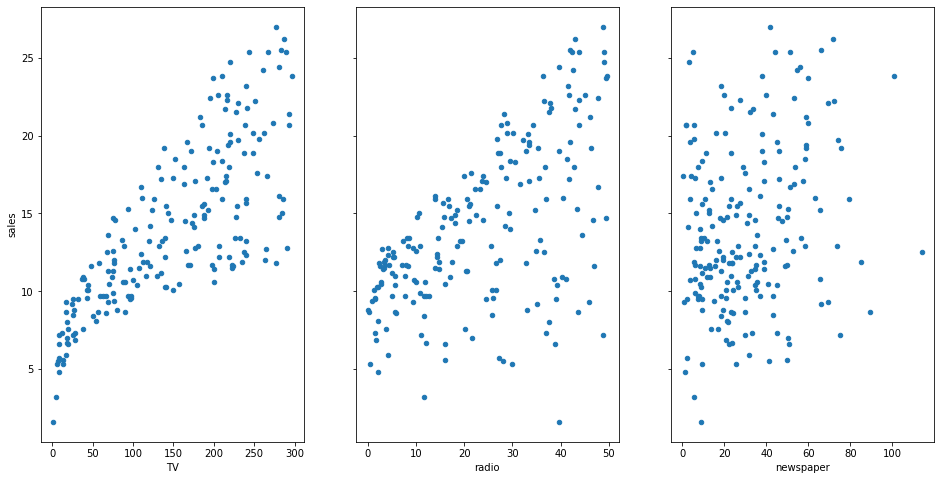

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

### Multiple Linear Regression
we'll include multiple features and create a model to see the relationship between the features and the label column.
This is called Multiple Linear Regression

In [13]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


How do we interpret these coefficients? If we look at the coefficients, the coefficient for the newspaper spends is negative. It means that the money spent for newspaper advertisements is not contributing in a positive way to the sales.

In [16]:
import statsmodels.formula.api as smf
# model summary output
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        12:10:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are the things to be learnt from this summary?

TV and Radio have positive p-values, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.
The expenses on bot TV and Radio ads arepositively associated with Sales, whereas the expense on newspaper ad is slightly negatively associated with the Sales.
This model has a higher value of R-squared (0.897) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV.

### Feature Selection
How do I decide which features have to be included in a linear model? Here's one idea:

- Try different models, and only keep predictors in the model if they have small p-values.
- Check if the R-squared value goes up when you add new predictors to the model.

What are the drawbacks in this approach? - If the underlying assumptions for creating a Linear model(the features being independent) are violated(which usually is the case),p-values and R-squared values are less reliable.

- Using a p-value cutoff of 0.05 means that adding 100 predictors to a model that are pure noise, still 5 of them (on average) will be counted as significant.
- R-squared is susceptible to model overfitting, and thus there is no guarantee that a model with a high R-squared value will generalise. Following is an example:

In [17]:
# only add TV and radio to the model 
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.rsquared

0.8971942610828956

In [18]:
# now also add newspaper (which is believed to have less/no association with sales)
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

Selecting the model with the highest value of R-squared is not a correct approach as the value of R-squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use **adjusted R-squared** which penalises the model complexity (to control overfitting), but this again generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

a better approach to feature selection is**Cross-validation.** It provides a more reliable way to choose which of the created models will best **generalise** as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.

### Handling Categorical Predictors with Two Categories

Till now we can Numerical Predictors. But, What if we have non-numeric Categorical values for one of the features.
Let's create a Categorical column Scale and fill it with Random values, then Categorize them as Small or Large.

In [19]:
import numpy as np

# seed for reproducibility
np.random.seed(12345)

# Mask half the number range to be set as Large in the next step
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set all the values for scale as small
data['Scale'] = 'small'

# Update values to Large based on Data location
data.loc[mask_large, 'Scale'] = 'large'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


For Scikit Learn libraries, the data must be represented in numerical values. If the categorical values are have only two values, we can create a new categorical column and map the categorical values with binary values

In [20]:
data['IsLarge'] = data.Scale.map({'large':1, 'small':0})
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


In [26]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X,y)

i=0
for col in feature_cols:
    print('The Coefficient of ' + col + ' is :',  lm.coef_[i])
    i=i+1

The Coefficient of TV is : 0.045719820924362775
The Coefficient of radio is : 0.1887281431342787
The Coefficient of newspaper is : -0.0010976794483516655
The Coefficient of IsLarge is : 0.05742385085482776


How do we interpret the coefficient for IsLarge? For a given TV/Radio/Newspaper ad expenditure if the average sales increases by 57.42 widgets, it’s considered as a large market.

What if the 0/1encoding is reversed? Still, the value of the coefficient shall be same, the only difference being the sign. It’ll be a negative number instead of positive

### Handling Categorical variables with more than two categories

Let's create a new column called Targeted Geography, and randomly assign observations to be rural, suburban, or urban:

In [30]:
np.random.seed(123456)

nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66

data['Targeted Geography'] = 'rural'
data.loc[mask_suburban, 'Targeted Geography'] = 'suburban'
data.loc[mask_urban, 'Targeted Geography'] = 'urban'
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography
0,1,230.1,37.8,69.2,22.1,large,1,rural
1,2,44.5,39.3,45.1,10.4,small,0,urban
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,urban
4,5,180.8,10.8,58.4,12.9,large,1,suburban


In [34]:
#create dummy variables using get dummies, create 3 dummies and ignore the first dummy 
dummies = pd.get_dummies(data['Targeted Geography'], prefix='Targeted Geography').iloc[:,1:]

# concatenate the dummy variables using concat, rows - axis=0 ; column - axis=1
data = pd.concat([data, dummies], axis=1)
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targeted Geography,Targeted Geography_suburban,Targeted Geography_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


What does the encoding say?
* rural is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=0
* suburban is encoded as Targeted Geography_suburban=1 and Targeted Geography_urban=0
* urban is encoded as Targeted Geography_suburban=0 and Targeted Geography_urban=1

Now the question is: **Why have we used two dummy columns instead of three?**

Because using only two dummy columns, we can capture the information of all the 3 columns. For example, if the value for Targeted Geography_urban as well as Targeted Geography_rural is 0, it automatically means that the data belongs to Targeted Geography_suburban.

This is called handling the **dummy variable trap**. If there are N dummy variable columns, then the same information can be conveyed by N-1 columns.
Let's include the two new dummy variables in the model:

In [35]:
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Targeted Geography_suburban', 'Targeted Geography_urban']
X = data[feature_cols]
y = data.sales

lm = LinearRegression()
lm.fit(X,y)

i=0
for col in feature_cols:
    print('The Coefficient of ' + col + ' is :',  lm.coef_[i])
    i=i+1

The Coefficient of TV is : 0.04574401036331375
The Coefficient of radio is : 0.1878666955252581
The Coefficient of newspaper is : -0.0010876977267107583
The Coefficient of IsLarge is : 0.07739660749747913
The Coefficient of Targeted Geography_suburban is : -0.10656299015958641
The Coefficient of Targeted Geography_urban is : 0.26813802165220046


How do we interpret the coefficients?
- If all other columns are constant, the _suburban_  geography is associated with an average **decrease** of 106.56 widgets in sales for $1000 spent. 

- if $1000 is spent in an _urban_ geography, it amounts to an average **increase** in Sales of 268.13 widgets

**A final note about dummy encoding:** If we have categories that can be ranked (i.e., worst, bad, good, better, best), we can potentially represent them numerically  as (1, 2, 3, 4, 5) using a single dummy column


## Multi- Collinearity

**Origin of the word:** The word multi-collinearity consists of two words:Multi, meaning multiple, and Collinear, meaning being linearly dependent on each other. 

For e.g.,
		Let’s consider this equation
		$ a+b=1  => b=1-a $
        
It means that ‘b’ can be represented in terms of ‘a’ i.e., if the value of ‘a’ 		changes, automatically the value of ‘b’ will also change. This equation 		denotes a simple linear relationship among two variables.

###### Definition: The purpose of executing a Linear Regression is to predict the value of a dependent variable based on certain independent variables.
So, when we perform a Linear Regression, we want our dataset to have variables which are independent i.e., we should not be able to define an independent variable with the help of another independent variable because now in our model we have two variables which can be defined based on a certain set of independent variables which defeats the entire purpose.
- Multi-collinearity is the statistical term to represent this type of a relation amongst the independent variable- when the independent variables are not so independent
- We can define multi-collinearity as the situation where the independent variables (or the predictors) have strong correlation amongst themselves.

<img src="multicollinearity_pic.PNG" width="500">

The mathematical flow for multicollinearity can be shown as:
<img src="multicollinearity_flow.PNG" width="500">

#### Why Should We Care About Multi-Collinearity?
* The coefficients in a Linear Regression model represent the extent of change in Y when a certain x (amongst X1,X2,X3…) is changed keeping others constant. But, if x1 and x2 are dependent, then this assumption itself is wrong that we are changing one variable keeping others constant as the dependent variable will also be changed. It means that our model itself becomes a bit flawed.
* We have a redundancy in our model as two variables (or more than two) are trying to convey the same information.
* As the extent of the collinearity increases, there is a chance that we might produce an overfitted model. An overfitted model works well with the test data but its accuracy fluctuates when exposed to other data sets. 
* Can result in a Dummy Variable Trap.

##### Detection
* __Pair Plots:__ Pair plots from Seaborn can give a fair idea about correlated variables. But this is suitable for smaller datasets.
* __Correlation Matrices and Plots:__ for correlation between all the X variables.
        
        This plot shows the extent of correlation between the independent variable. Generally, a correlation greater than 0.9 or less than -0.9 is to be avoided.
    <img src="cor.PNG" width="500">
* __Variance Inflation Factor:__ Regression of one X variable against other X variables.

     VIF=$\frac {1}{(1-R squared)}$

            The VIF factor, if greater than 10 shows extreme correlation between the variables and then we need to take care of the correlation.

#### Remedies for Multicollinearity

* **Do Nothing:** If the Correlation is not that extreme, we can ignore it. If the correlated variables are not used in solving our business question, they can be ignored.
* **Remove One Variable**: Like in dummy variable trap
* **Combine the correlated variables:** Like creating a seniority score based on Age and Years of experience
* Principal Component Analysis

## Bias Variance trade-off

Variance is a measure of the degree of the spread of the predicted results. Bias, on the other hand, is a measure of the polarity of the results i.e., the results are favored towards a specific outcome.  The problem with Bias and Variance can be depicted as follows:

<img src="bias_variance.PNG" width="300">
 
 As depicted in the figure, our goal is to minimize the Variance as well as Bias to get to accurate results.
If there are lesser number of predictors in the data set that too having big coefficients, it is a possibility that the model obtained is favored towards those predictors i.e., a small change in those predictors lead to a big change in the predicted result. In other words, that predictor is driving our model, or our model is biased for that predictor. An easy way to overcome this is to introduce more no. of predictors which contributes towards the end result of the prediction. This increases the complexity of the model or in other words, the variance in the model increases.
Mathematically,

Total Error = $Bias^2 + Variance + Irreducible Error$

Irreducible error is the error due to noise in the data.

Graphically it looks like:

<img src="tradeoff.PNG" width="300">

It can be seen that as the bias decreases, the variance increases.
 So, we need to find a balance so that we get a model which has low variance as well as low bias. This is called **bias-variance tradeoff.**

Bias can be minimized by training with more data and variance can be reduced by using regularization methods which we are going to discuss.